<a href="https://colab.research.google.com/github/sanyamChaudhary27/ML_models_from_scratch/blob/main/Algo_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib plotly seaborn scikit-learn --quiet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
class LinearRegression:
    def __init__(self, n_estimators: int = 100, learning_rate: float = 0.1):
        self.n_estimators= n_estimators
        self.learning_rate= learning_rate
        self.intercept= None
        self.weight= None

    def fit(self, x, y):
        self.X= x
        self.y= y
        n_samples, n_features = self.X.shape
        self.weight= np.zeros(n_features)
        self.intercept= 0


        '''Using Stochastic gradient descent'''
        for _ in range(self.n_estimators):
            for i in range(n_samples):
                preds= self.predict(self.X[i, :]).reshape(-1, 1)
                error= preds-self.y[i, :].reshape(-1, 1)
                # Fixed: Update the entire weight vector, not by sample index 'i'
                self.weight = self.weight - self.learning_rate*(2/n_samples) * (self.X[i, :].flatten()*error.flatten()[0])
                self.intercept = self.intercept - self.learning_rate*(2/n_samples) * error.flatten()[0]

    def predict(self, X):
        if self.weight is None:
            raise ValueError('Please call slf.fit() first')
        return self.intercept + np.dot(X, self.weight)

    def plot_it(self):
        if self.X is None or self.y is None:
            raise ValueError('Plese fit the model before calling plot_it( ). Please note: this functioon is for education purpose only')
        n_sampples, n_features= self.X.shape
        if n_features == 1:
            plt.figure(figsize=(8, 6))
            plt.scatter(self.X, self.y, color='blue', label='Data points')
            x_line = np.linspace(self.X.min(), self.X.max(), 100).reshape(-1, 1)
            y_line = self.predict(x_line)
            plt.plot(x_line, y_line, color='red', label='Best fit line')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('data points and best fit line')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print(f'Plotting is supported for only 2 dimensional data[for edu. purpose] i.e 1 feature. This model has{n_features} features')

In [ ]:
np.random.seed(42)
num_samples = 1000
X = np.random.rand(num_samples, 1)
y = 2*X+np.random.randn(num_samples, 1)/5

print('First 5 rows of x:', X[: 5])
print('First 5 rows of y:', y[: 5])

First 5 rows of x: [[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]]
First 5 rows of y: [[0.78462044]
 [1.63435974]
 [1.54002745]
 [1.31943412]
 [0.42399537]]


In [ ]:
'''I id some minimal changes in the LinearRegression classs so please do aacknowledge them. These were some typos fixes'''

'I id some minimal changes in the LinearRegression classs so please do aacknowledge them. These were some typos fixes'

In [ ]:
model = LinearRegression(learning_rate=0.01, n_estimators=1000)

In [ ]:
model.fit(X, y)

In [ ]:
preds = model.predict(y)

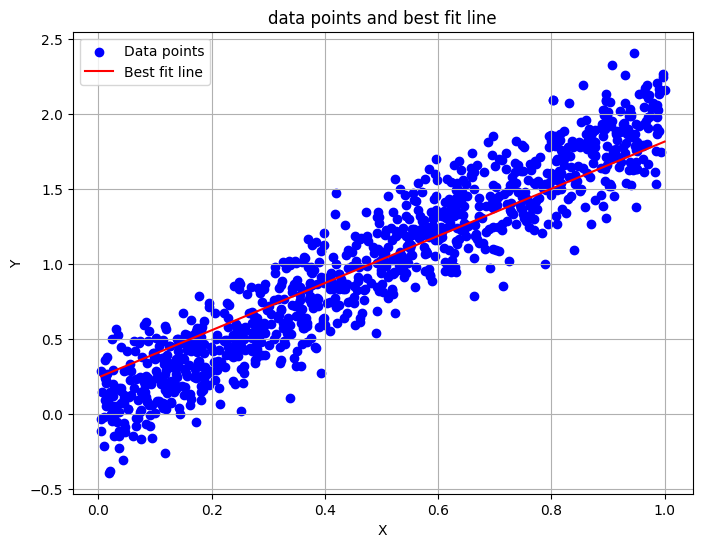

In [ ]:
model.plot_it()

In [ ]:
print(min(y))
print(max(y))

[-0.39423437]
[2.41014365]


In [ ]:
np.std(y)

np.float64(0.6079132739781045)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
Rmse = np.sqrt(mean_squared_error(preds, y))
print(Rmse)

0.8890246312185579
